# Breast Cancer Dataset Analysis (BRCA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app


<bound method NDFrame.head of Id    Group  a100130426  a100133144  a100134869      a10357       a10431  \
0   LIHC_TP    0.000000    2.310000    5.690000  138.300000  1561.000000   
1   LIHC_TP    0.000000   53.590000    5.410000  144.070000  1297.000000   
2   LIHC_TP    0.000000    6.860000    6.140000   73.930000  1423.000000   
3   LIHC_NT    0.000000    2.000000    0.000000  103.920000  1454.000000   
4   LIHC_NT    0.000000    1.410000    2.590000   96.890000  1125.000000   
5   LIHC_NT    0.000000    4.940000    1.060000   97.030000  2128.000000   
6   BRCA_TP    0.000000   16.364400   12.931600   52.150300   408.076000   
7   BRCA_TP    0.906600   11.622800    9.229400  154.297400  1360.834100   
8   BRCA_TP    0.000000   12.089400   11.079900  143.864300   865.535800   
9   BRCA_NT    0.000000    4.333300    3.920600   78.923800   978.412700   
10  BRCA_NT    0.000000    4.208700    2.185200   53.638000   970.756900   
11  BRCA_NT    0.000000    3.055000    0.000000   87.57640

Text(0.5, 0.98, 'Top Upregulated & Downregulated Genes for Breast Cancer (BRCA) Dataset')

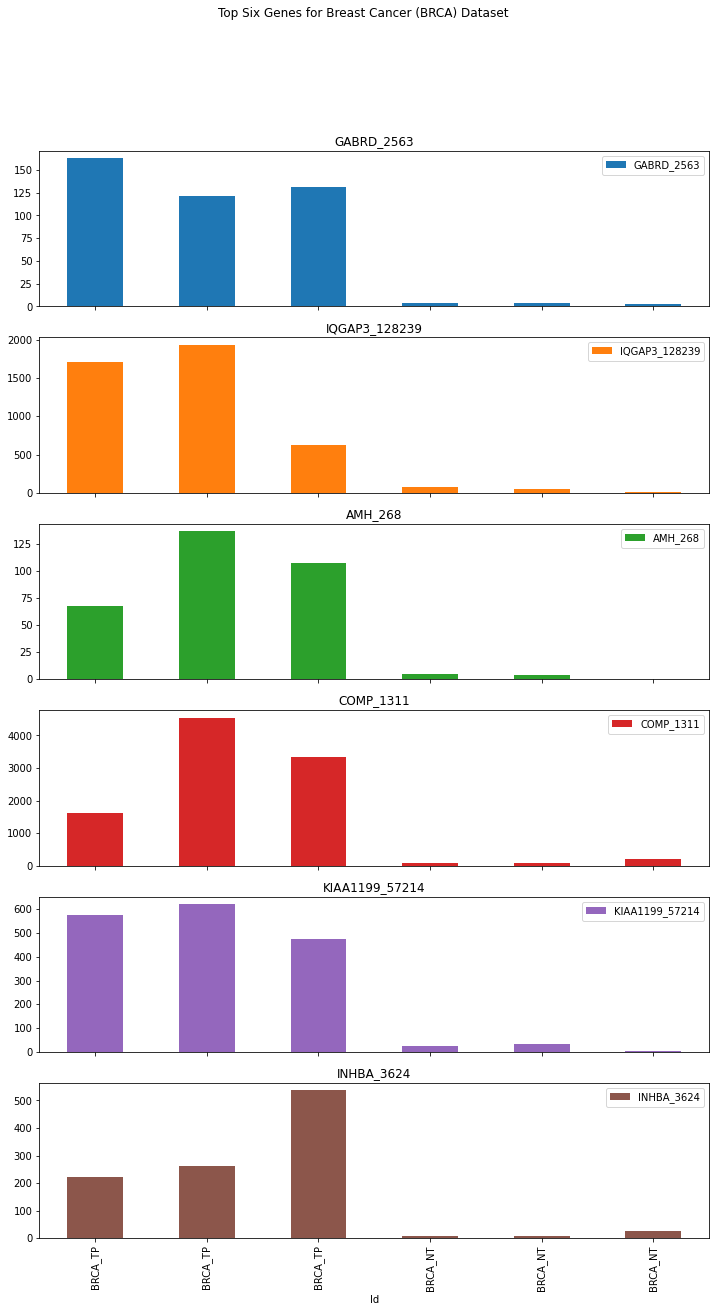

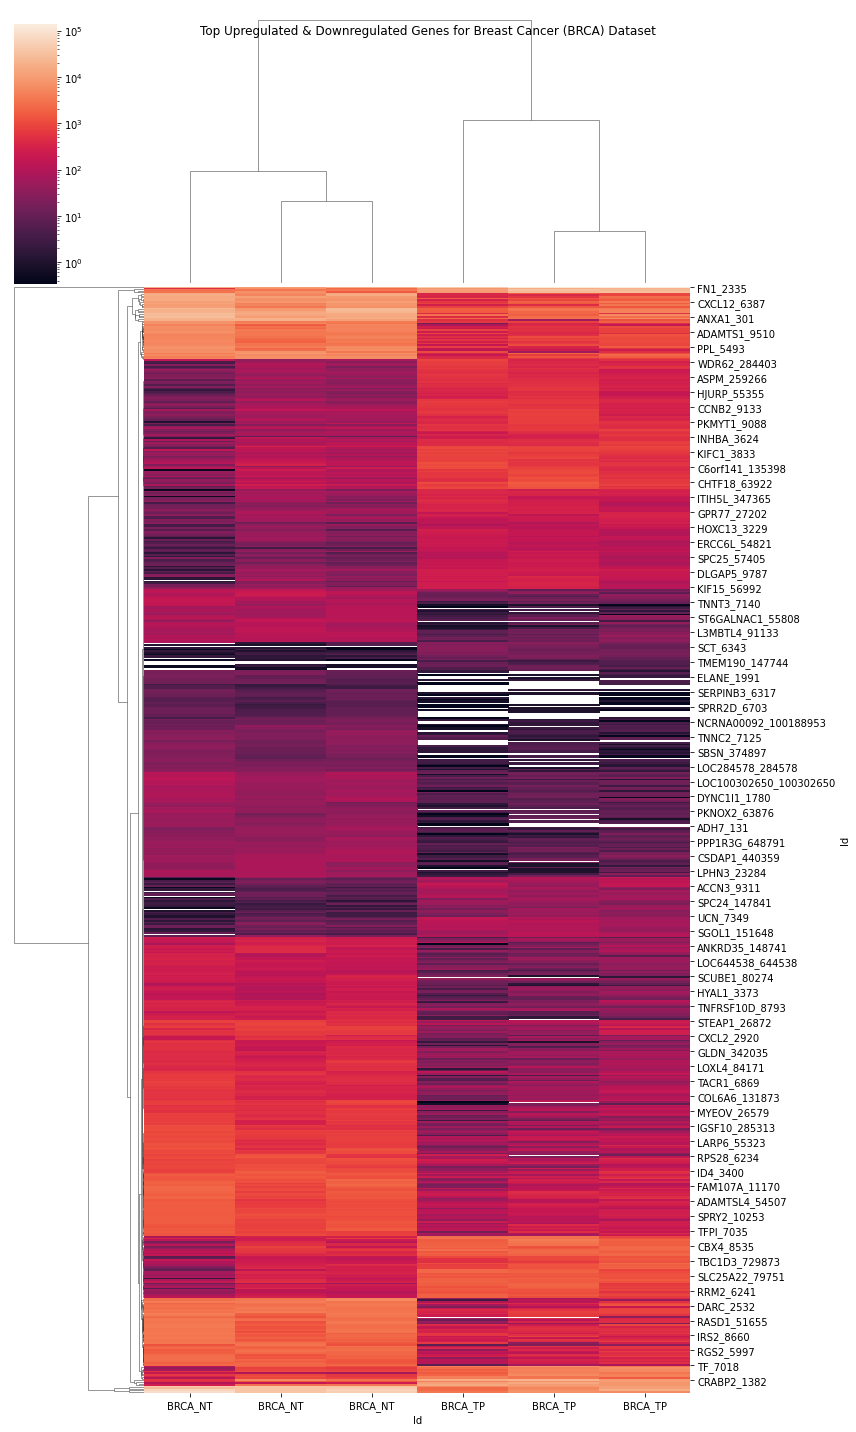

In [ ]:
#Import packages to run code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as rp
import scipy.stats as stats
#to use t-test, we need to install a package called "researchpy"
!pip install researchpy --q
#Load data
data = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt ', header= None)
data.columns = data.iloc[0] #set row name
data.index = data.Id #set column name
data = data.drop(index='Id') #index=ID, first column
data = data.drop(['Id'], axis = 1) #remove ID column
data.index=data.index.str.replace('|','_') #change |### to _### by gene name in index column
data = data.rename(index={'class':'Group'})#Identify Class as Group to be header after transpose data
data = data.transpose()#transpose the data frame
data = data.apply(pd.to_numeric, errors="ignore") #make sure the data is numeric to analyze
#Generate list of p-values for each gene using a for loop for each column (gene) in the dataset
p_vals=['p-value']
for i in range(1,20532):
  p_vals.append(stats.ttest_ind(data.iloc[:,i][data['Group'] == 'BRCA_NT'], data.iloc[:,i][data['Group'] == 'BRCA_TP'])[1])
#See p-value results
p_vals
#Add results to main data frame, append list of p-values to the last row
p_vals1= pd.Series(p_vals, index= data.columns) 
data= data.append(p_vals1, ignore_index=True)
#Calculate the Fold Change difference for each gene
logFC=['logFC']
for i in range(1,20532):
  logFC.append(np.log((data.iloc[:,i][data['Group'] == 'BRCA_NT'].mean()+1)/(data.iloc[:,i][data['Group'] == 'BRCA_TP'].mean()+1)))
#Add Fold Change to the main table
logFC1= pd.Series(logFC,index=data.columns)
data= data.append(logFC1, ignore_index=True)
#Check that the p-value & Fold Change was added to the last row
print(data.head)
#Filter the data by p-value<0.05
data_sign= data.transpose()
#Adds column and row ID names again
data_sign= data_sign.rename(index={'Group':'Id'}) 
#Column identifers that were #'s are now group names
data_sign.columns = data_sign.loc['Id'] 
#Clean up extra row (axis=0)
data_sign= data_sign.drop(['Id'], axis=0) 
#Only include columns needed for contrast
data_sign = data_sign.iloc[:,6:14] #iloc, index- column
#Keep genes with p-value<0.05 and logFC >1.5 or less than -1.5
data_sign= data_sign[data_sign["p-value"]<0.05]
data_sign1= data_sign[(data_sign['logFC']>1.5) | (data_sign['logFC']<-1.5)]
data_sign1=data_sign1.sort_values(by=['logFC'])
#Save dataframe to CSV
data_sign1.to_csv("BRCA_NTvsTP.csv")
#Generate Report
totalsignificant=len(data_sign1)
percentagessignificant= round(len(data_sign1)/(len(data.columns))*100, 2)
upregulated = len(data_sign1[data_sign1['logFC']>1.5])
downregulated = len(data_sign1[data_sign1['logFC']<-1.5])
print("DEG analysis was performed contrasting BRCA NT and TP samples")
print("%s genes(%s %% of all genes) were found to be signifianctly differentially expressed"% (totalsignificant, percentagessignificant))
print("Out of this number, there were %s upregulated genes and %s downregulated genes"% (upregulated, downregulated), end="\n\n")
print("Top 10 differentially expressed genes:\n")
print(data_sign1.iloc[1:20,6:8], end="\n\n")
#Visualize top genes as a bar plot
data_sign1.iloc[1:7,0:6].T.plot.bar(subplots=True, title="Top Six Genes for Breast Cancer (BRCA) Dataset", figsize=(12, 20))
#Visualize data as a heat map
import seaborn as sns
from matplotlib.colors import LogNorm
data_sign1= data_sign1.iloc[:, 0:6]
data_sign1= data_sign1.astype(float)
g=sns.clustermap(data_sign1, figsize=(12,20), norm=LogNorm())
g.fig.suptitle('Top Upregulated & Downregulated Genes for Breast Cancer (BRCA) Dataset')

# Liver Cancer Dataset Analysis (LIHC)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  app.launch_new_instance()


<bound method NDFrame.head of Id    Group  a100130426  a100133144  a100134869      a10357       a10431  \
0   LIHC_TP      0.0000    2.310000    5.690000  138.300000  1561.000000   
1   LIHC_TP      0.0000   53.590000    5.410000  144.070000  1297.000000   
2   LIHC_TP      0.0000    6.860000    6.140000   73.930000  1423.000000   
3   LIHC_NT      0.0000    2.000000    0.000000  103.920000  1454.000000   
4   LIHC_NT      0.0000    1.410000    2.590000   96.890000  1125.000000   
5   LIHC_NT      0.0000    4.940000    1.060000   97.030000  2128.000000   
6   BRCA_TP      0.0000   16.364400   12.931600   52.150300   408.076000   
7   BRCA_TP      0.9066   11.622800    9.229400  154.297400  1360.834100   
8   BRCA_TP      0.0000   12.089400   11.079900  143.864300   865.535800   
9   BRCA_NT      0.0000    4.333300    3.920600   78.923800   978.412700   
10  BRCA_NT      0.0000    4.208700    2.185200   53.638000   970.756900   
11  BRCA_NT      0.0000    3.055000    0.000000   87.57640

Text(0.5, 0.98, 'Top Upregulated & Downregulated Genes for Liver Cancer (LIHC) Dataset')

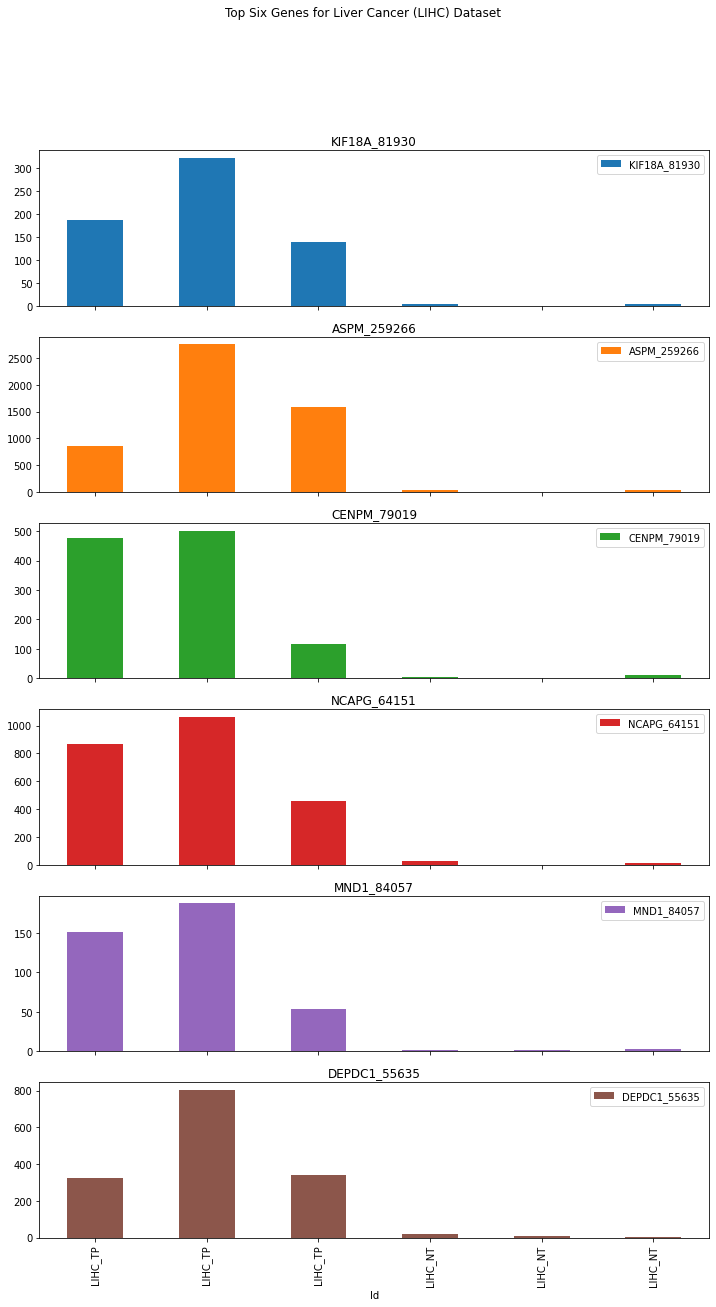

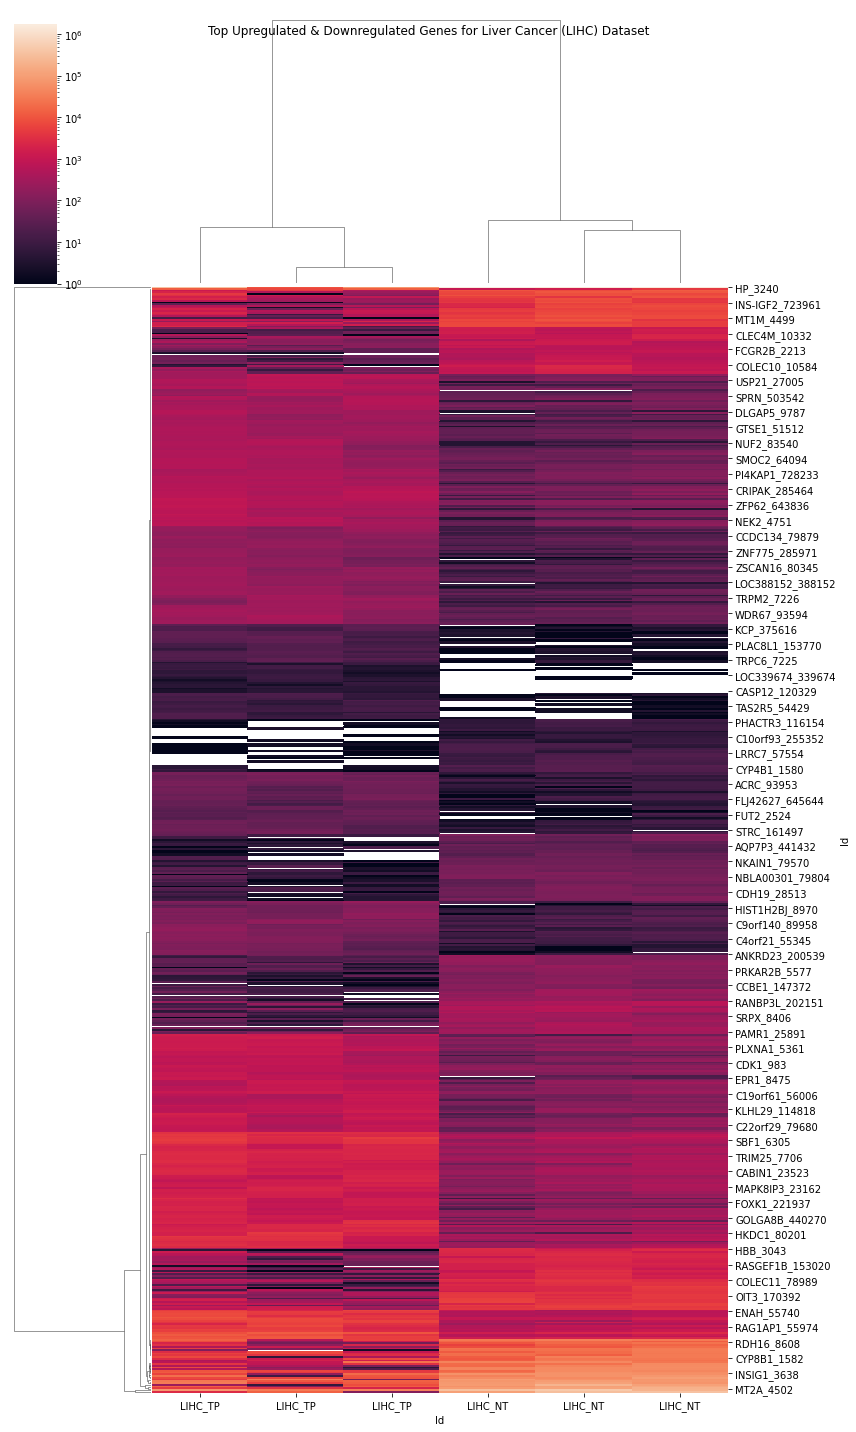

In [4]:
# Load a new dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#to use t-test, we need to install a package called "researchpy"
!pip install researchpy
#load packages
import researchpy as rp
import scipy.stats as stats

data = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/LIHC_BRCA_data1_marked.txt ', header= None)
data.columns = data.iloc[0] #set column name
data.index = data.Id #set row name
data = data.drop(index='Id') #index=ID, first column
data = data.drop(['Id'], axis = 1) #remove ID column
data.index=data.index.str.replace('|','_') #change |### to _### by gene name in index column
data = data.rename(index={'class':'Group'})#Identify Class as Group to be header after transpose data
data = data.transpose()#transpose the data frame
data = data.apply(pd.to_numeric, errors="ignore") #make sure the data is numeric
#Generate list of p-values for each gene using a for loop for each column (gene) in the dataset
p_vals=['p-value']
for i in range(1,20532):
  p_vals.append(stats.ttest_ind(data.iloc[:,i][data['Group'] == 'LIHC_NT'], data.iloc[:,i][data['Group'] == 'LIHC_TP'])[1])
#See p-value results
p_vals
#Add results to main data frame, append list of p-values to the last row
p_vals1= pd.Series(p_vals, index= data.columns) 
data= data.append(p_vals1, ignore_index=True)
#Calculate the Fold Change difference for each gene
#(fold = mean of group 1 divided by mean of group 2; or if in log scale, mean of g1-mean of g2)
logFC=['logFC']
for i in range(1,20532):
  logFC.append(np.log((data.iloc[:,i][data['Group'] == 'LIHC_NT'].mean()+1)/(data.iloc[:,i][data['Group'] == 'LIHC_TP'].mean()+1)))
#Add Fold Change to the main table
logFC1= pd.Series(logFC,index=data.columns)
data= data.append(logFC1, ignore_index=True)
#Check that the p-value & Fold Change was added to the last row
print(data.head)
#Filter the data by p-value<0.05
data_sign= data.transpose()
#Adds column and row ID names again
data_sign= data_sign.rename(index={'Group':'Id'}) 
#Column identifers that were #'s are now group names
data_sign.columns = data_sign.loc['Id'] 
#Clean up extra row (axis=0)
data_sign= data_sign.drop(['Id'], axis=0) 
#Only include columns needed for contrast
data_sign = data_sign.iloc[:,0:14]
#Keep genes with p-value<0.05 and logFC >1.5 or less than -1.5
data_sign= data_sign[data_sign["p-value"]<0.05]
data_sign1= data_sign[(data_sign['logFC']>1.5) | (data_sign['logFC']<-1.5)]
data_sign1=data_sign1.sort_values(by=['logFC'])
#Save dataframe to CSV
data_sign1.to_csv("LIHC_NTvsTP.csv")
#Generate Report
totalsignificant=len(data_sign1)
percentagessignificant= round(len(data_sign1)/(len(data.columns))*100, 2)
upregulated = len(data_sign1[data_sign1['logFC']>1.5])
downregulated = len(data_sign1[data_sign1['logFC']<-1.5])
print("DEG analysis was performed contrasting LIHC NT and TP samples")
print("%s genes(%s %% of all genes) were found to be signifianctly differentially expressed"% (totalsignificant, percentagessignificant))
print("Out of this number, there were %s upregulated genes and %s downregulated genes"% (upregulated, downregulated), end="\n\n")
print("Top 10 differentially expressed genes:\n")
print(data_sign1.iloc[1:20,12:14], end="\n\n")
#Visualize top genes as a bar plot
data_sign1.iloc[1:7,0:6].T.plot.bar(subplots=True, title="Top Six Genes for Liver Cancer (LIHC) Dataset", figsize=(12,20))
#Visualize data as a heat map
import seaborn as sns
from matplotlib.colors import LogNorm
data_sign1= data_sign1.iloc[:, 0:6]
data_sign1= data_sign1.astype(float)
g= sns.clustermap(data_sign1, figsize=(12,20), norm=LogNorm())
g.fig.suptitle('Top Upregulated & Downregulated Genes for Liver Cancer (LIHC) Dataset')

# Summary

 In order to identify significantly different gene expressions amongst the breast cancer (BRCA dataset) and liver cancer tumor (LIHC dataset) samples from The Cancer Genome Atlas study, I compared them to their respective normal tissue (NT) controls using t-tests. Once I ran the t-tests, I filtered out the most significant results (smallest p-values <0.05) and highest fold changes to determine the genes that had the greatest difference in expression between these two groups. Having a p-value less than 0.05 is important as that means that the observation being made has less than a 5% chance of occurring due to chance alone. Identifying genes with high fold changes will show us how many times more one gene is being expressed in a sample compared to another. This gives us insight into the upregulation and downregulation of gene expression between the samples, which can be further seen in the heat maps produced for the breast cancer and liver cancer datasets. The top six genes with a significant difference in gene expression between cancer and normal tissue samples for each condition can also be seen in the bar plots above.
 
 The top two genes for the breast cancer dataset are GABRD (p-value= 0.000409, log fold change= -3.457911) and IQGAP3 (p-value=0.027874, log fold change= -3.371955). GABRD has been reportedly involved in cell adhesion and integrin binding, which can lead to cancer and improve its ability to survive in different locations. GABRD is up-regulated in many cancers, such as colon cancer, and is also up-regulated in breast cancer samples, as shown in the Breast Cancer Dataset's bar plots (Yan et al., 2020). However, GABRD's mechanism in cancer and its potential to be a biomarker for breast cancer are still being elucidated (Yan et al., 2020). The second gene with a significant difference in expression between the breast cancer tumor samples (TP) and the normal breast tissue is IQGAP3. Overexpression of this gene in breast cancer tissues has been associated with poor prognosis and resistance to radiation therapy in patients (Hua et al., 2021). Despite IQGAP3's role in cell proliferation and these findings, its clinical relevance is still uncertain (Hua et al., 2021). However, based on the findings from this dataset and Hua's study, there is potential as a biomarker in patient tissue samples. Overall the breast cancer dataset contained 665 statistically significant genes with 421 up-regulated and 244 down-regulated genes in the normal breast tissue samples compared to the breast solid tumor samples.
 
 Based on my analysis of the top 10 gene expression list for the liver cancer samples, the gene with the lowest p-values (0.017987) and highest log fold-change (-4.079077) was KIF18A. This difference in expression can also be easily visualized through the barplot as the liver primary solid tumor (TP) samples had significantly increased expression of KIF18A compared to the normal liver tissue samples (NT). KIF18A is involved in mitosis as it is a member of the kinesin family and helps to control chromosomal alignment. This finding further supports previous publications that KIF18A could be a biomarker for hepatocarcinoma cancer as high gene expressions correlate with poor prognosis (Liao et al., 2014). The second gene with the greatest significant difference in expression is ASPM, with a p-value of 0.036374 and a log-fold change of -4.02516. This result is also consistent with other studies in liver cancer, as a high expression of ASPM has been associated with overall shorter survival in patients as it is thought to be involved in cell proliferation (Zhang et al., 2021). Lastly, 3.13% (642 genes) of the genes analyzed were significantly (233 genes) up-regulated or (409 genes) down-regulated in the normal liver tissue samples compared to the liver cancer tissue samples.

References: 
Hua, X., Long, Z.-Q., Guo, L., Wen, W., Huang, X., Zhang, W.-W., &amp; Lin, H.-X. (2021). IQGAP3 overexpression correlates with poor prognosis and radiation therapy resistance in breast cancer. Frontiers in Pharmacology, 11. https://doi.org/10.3389/fphar.2020.584450 

Liao, W., Huang, G., Liao, Y., Yang, J., Chen, Q., Xiao, S. J., Jin, J., He, S., &amp; Wang, C. (2014). High KIF18A expression correlates with unfavorable prognosis in primary hepatocellular carcinoma. Oncotarget, 5(21), 10271–10279. https://doi.org/10.18632/oncotarget.2082 

Yan, L., Gong, Y. Z., Shao, M. N., Ruan, G. T., Xie, H. L., Liao, X. W., Wang, X. K., Han, Q. F., Zhou, X., Zhu, L. C., Gao, F., &amp; Gan, J. L. (2020). Distinct diagnostic and prognostic values of γ‑aminobutyric acid type A receptor family genes in patients with colon adenocarcinoma. Oncology Letters, 20(1), 275–291. https://doi.org/10.3892/ol.2020.11573 

Zhang, H., Yang, X., Zhu, L., Li, Z., Zuo, P., Wang, P., Feng, J., Mi, Y., Zhang, C., Xu, Y., Jin, G., Zhang, J., &amp; Ye, H. (2021).
ASPM promotes hepatocellular carcinoma progression by activating Wnt/β‐catenin signaling through antagonizing autophagy‐mediated DVL2 degradation. FEBS Open Bio, 11(10), 2784–2799. https://doi.org/10.1002/2211-5463.13278 
